<a href="https://colab.research.google.com/github/LS10432/PDDS-PYD-0825-06Oct2025B/blob/main/Project/A3/A3_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# @title
import pandas as pd

# Define the local path and the URL for the covid dataset
local_path = '/content/owid-covid-data.csv'
covid_url = 'https://lms.educlaas.com/assets/courseware/v1/e206258dd748e86b8bb35fc039e90fa8/asset-v1:EduCLaSS+PYD+PDDS-PYD-0825-06Oct2025B+type@asset+block/owid-covid-data.csv'

try:
    # Try to read the Titanic dataset from the local path
    df = pd.read_csv(local_path)
    print(f"Successfully loaded data from {local_path}")
    print("\n")
except FileNotFoundError:
    # If the local file is not found, read the dataset from the URL
    df = pd.read_csv(covid_url)
    print(f"Local file not found. Loading data from {covid_url}")
    print("\n")

print(f"Total number of columns: {df.shape[1]}")
print(f"Total number of rows: {df.shape[0]}")

# Identify and count missing values in each column
print(df.isnull().sum())

# Display columns with missing values and count how many columns have no missing values
missing_cols = df.isnull().sum() != 0
print(f"Number of columns with no missing values: {len(missing_cols) - missing_cols.sum()}")
print(f"Number of columns with missing values: {missing_cols.sum()}")

missing_values_percentage = df.isnull().mean() * 100
columns_to_drop = missing_values_percentage[missing_values_percentage > 90].index.tolist()

print("Columns with more than 90% missing values:")
print(columns_to_drop)

# Print number of columns to be dropped
print(f"Number of columns to be dropped: {len(columns_to_drop)}")
print("Column Names to be dropped:")
print(columns_to_drop)

# Remove columns with more than 90% missing values
df = df.drop(columns=columns_to_drop)

# Print number of columns remaining
print("\n")
print(f"Number of columns after removal: {df.shape[1]}")

# Convert the 'date' column from object type to datetime type
df['date'] = pd.to_datetime(df['date'])

# Print the number of missing values per column before imputation
print("Number of missing values per column before imputation:")
print(df.isnull().sum())

# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print (f"Number of columns with numerical value :{len(numerical_cols)}")

# Impute missing values in numerical columns using the mean
for col in numerical_cols:
    if df[col].isnull().any():
        mean_val = df[col].mean()
        df[col] = df[col].fillna(mean_val)

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print (f"Number of columns with non-numerical value :{len(categorical_cols)}")

# Impute missing values in categorical columns using the mode
for col in categorical_cols:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0] # mode() can return multiple values, take the first
        df[col] = df[col].fillna(mode_val)

# Print the number of remaining missing values per column
print("\nNumber of remaining missing values per column after imputation:")
print(df.isnull().sum())

# Get the number of rows before removing duplicates
rows_before = df.shape[0]
print(f"Number of rows before removing duplicates: {rows_before}")

# Count the number of duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Count the number of unique duplicate rows
unique_duplicate_rows = df[df.duplicated()].shape[0]
print(f"Number of unique duplicate rows: {unique_duplicate_rows}")

# Remove duplicate rows
df = df.drop_duplicates()

# Get the number of rows after removing duplicates
rows_after = df.shape[0]
print(f"Number of rows after removing duplicates: {rows_after}")

# Extract year and month from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Get unique countries from the 'location' column
unique_countries = df['location'].unique()

# Count the number of unique countries
num_unique_countries = len(unique_countries)

# Print the total count of unique countries
print(f"Total number of unique countries: {num_unique_countries}")

# Display the list of unique countries
print("\nList of unique countries:")
print(unique_countries)

Local file not found. Loading data from https://lms.educlaas.com/assets/courseware/v1/e206258dd748e86b8bb35fc039e90fa8/asset-v1:EduCLaSS+PYD+PDDS-PYD-0825-06Oct2025B+type@asset+block/owid-covid-data.csv


Total number of columns: 67
Total number of rows: 358838
iso_code                                        0
continent                                   17108
location                                        0
date                                            0
total_cases                                 38210
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       346627
excess_mortality_cumulative                346627
excess_mortality                           346627
excess_mortality_cumulative_per_million    346627
Length: 67, dtype: int64
Number of columns with no missing values: 4
Number of columns with missing values: 63
Columns with more than 90% missing values:
['weekly_icu_admissions', 'weekly_

# Activity 3: Global COVID-19 Overview
Worldwide COVID-19 Overview Providing a global and temporal perspective on COVID-19, identifying patterns and correlations crucial for strategic decision-making.

## Visualize total cases and deaths by continent
1. Visualize the WHO Regions (Continent column in dataset) with total COVID-19 cases and total deaths by using bar plots.

### Prepare data for visualization
Aggregate the data by continent to calculate the total cases and deaths for each continent.


**Reasoning**:
Aggregate the data by continent to calculate the total cases and deaths for each continent.



In [3]:
df_continent = df.groupby('continent')[['total_cases', 'total_deaths']].sum().reset_index()
display(df_continent)

,continent,total_cases,total_deaths
0,Africa,1.729765e+12,2.077518e+10
1,Asia,2.447360e+11,2.525415e+09
2,Europe,2.278041e+11,2.778771e+09
3,North America,1.157474e+11,2.125727e+09
4,Oceania,8.185264e+10,1.477310e+09
5,South America,6.259182e+10,1.520126e+09


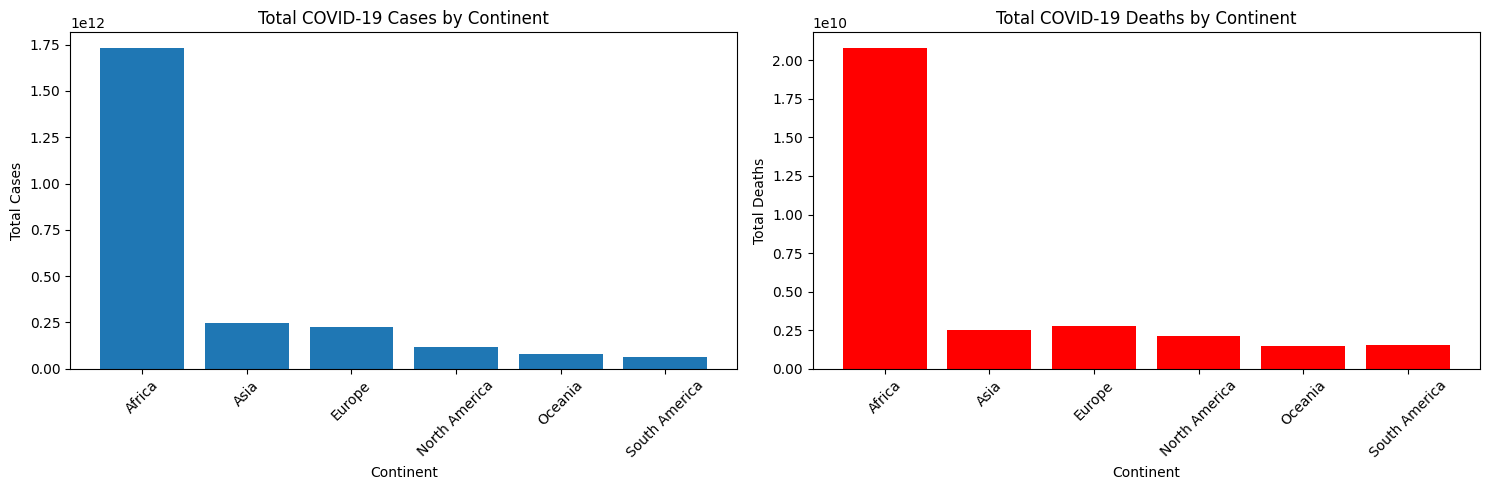

In [4]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot for total cases by continent
axes[0].bar(df_continent['continent'], df_continent['total_cases'])
axes[0].set_title('Total COVID-19 Cases by Continent')
axes[0].set_xlabel('Continent')
axes[0].set_ylabel('Total Cases')
axes[0].tick_params(axis='x', rotation=45)

# Bar plot for total deaths by continent
axes[1].bar(df_continent['continent'], df_continent['total_deaths'], color='red')
axes[1].set_title('Total COVID-19 Deaths by Continent')
axes[1].set_xlabel('Continent')
axes[1].set_ylabel('Total Deaths')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()

## Visualize worldwide monthly trend
2. Explore the world wide monthly trend of  COVID-19 cases using a line plot.

### Prepare data for worldwide monthly trend
Aggregate the data by year and month to calculate the total worldwide COVID-19 cases for each month.


**Reasoning**:
Aggregate the data by year and month to calculate the total worldwide COVID-19 cases for each month.



In [11]:
df_monthly_cases = df.groupby(['year', 'month'])['total_cases'].sum().reset_index()
display(df_monthly_cases)

df_monthly_cases.info()

'''
# Create a 'year_month' column
df_cleaned['year_month'] = df_cleaned['date'].dt.to_period('M')

# Group by month and sum cases
monthly_cases = df_cleaned.groupby('year_month')['total_cases'].sum().reset_index()

# Convert back to datetime for plotting
monthly_cases['year_month'] = monthly_cases['year_month'].dt.to_timestamp()
print(monthly_cases.head())
'''


,year,month,total_cases
0,2020,1,4.623913e+10
1,2020,2,4.130453e+10
2,2020,3,2.043716e+10
3,2020,4,6.876284e+09
4,2020,5,6.421527e+09
5,2020,6,6.539742e+09
6,2020,7,7.459128e+09
7,2020,8,8.439781e+09
8,2020,9,9.197913e+09
9,2020,10,1.034004e+10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         47 non-null     int32  
 1   month        47 non-null     int32  
 2   total_cases  47 non-null     float64
dtypes: float64(1), int32(2)
memory usage: 884.0 bytes


"\n# Create a 'year_month' column\ndf_cleaned['year_month'] = df_cleaned['date'].dt.to_period('M')\n \n# Group by month and sum cases\nmonthly_cases = df_cleaned.groupby('year_month')['total_cases'].sum().reset_index()\n \n# Convert back to datetime for plotting\nmonthly_cases['year_month'] = monthly_cases['year_month'].dt.to_timestamp()\nprint(monthly_cases.head())\n"

**Reasoning**:
Create a line plot to visualize the worldwide monthly trend of COVID-19 cases



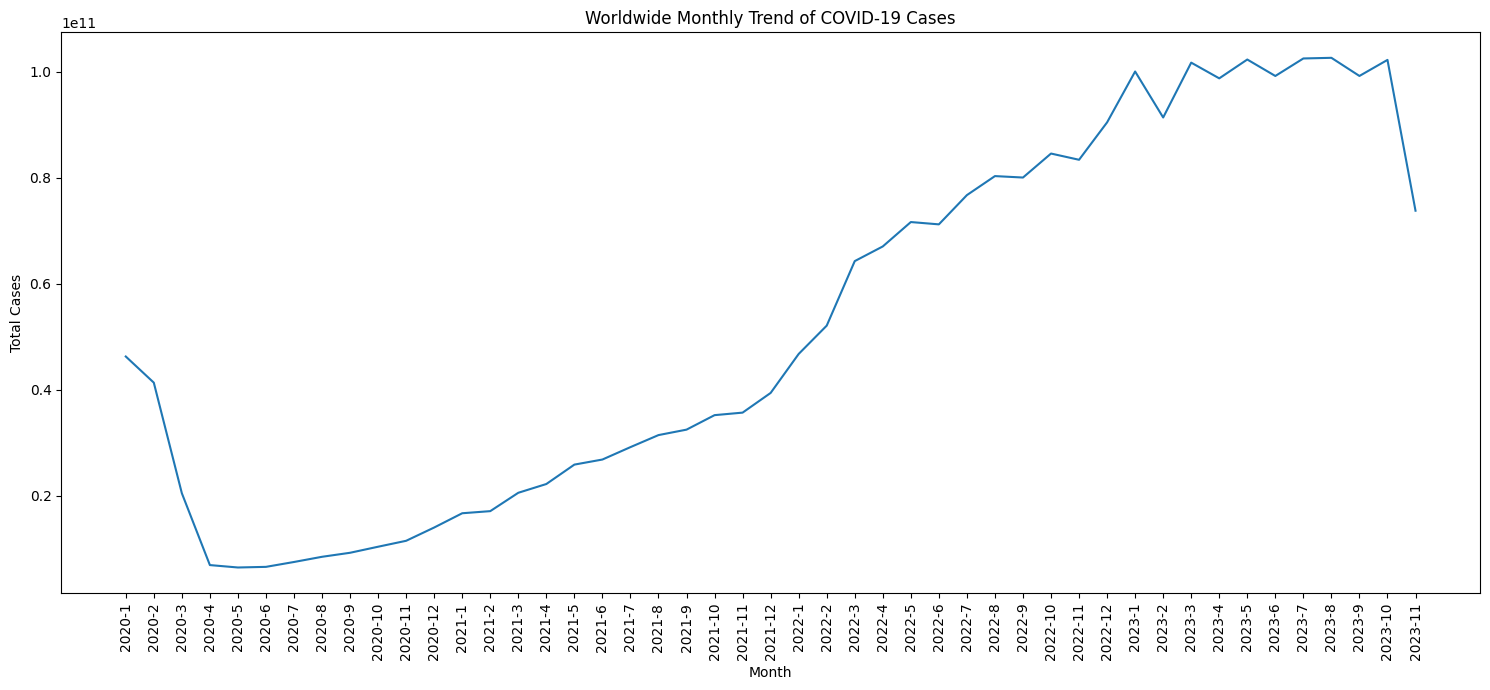

In [6]:
import matplotlib.pyplot as plt

# Create a combined year-month string for the x-axis
df_monthly_cases['year_month'] = df_monthly_cases['year'].astype(str) + '-' + df_monthly_cases['month'].astype(str)

# Create a line plot
plt.figure(figsize=(15, 7))
plt.plot(df_monthly_cases['year_month'], df_monthly_cases['total_cases'])
plt.title('Worldwide Monthly Trend of COVID-19 Cases')
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Visualize correlation
3. Investigate the correlation between total cases and total deaths using a heatmap.

### Prepare data for correlation analysis
Select the relevant columns (`total_cases` and `total_deaths`) and calculate the correlation matrix.


**Reasoning**:
Select the 'total_cases' and 'total_deaths' columns and calculate the correlation matrix.



In [7]:
correlation_matrix = df[['total_cases', 'total_deaths']].corr()
display(correlation_matrix)

,total_cases,total_deaths
total_cases,1.000000,0.937965
total_deaths,0.937965,1.000000


**Reasoning**:
Create a heatmap to visualize the correlation between total cases and total deaths using the previously calculated correlation matrix.



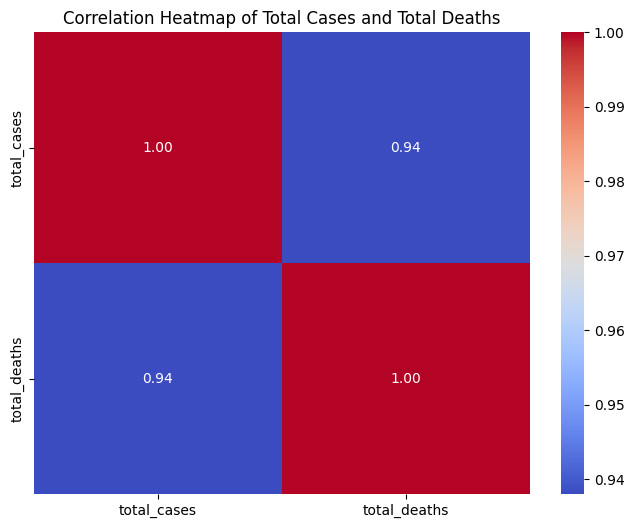

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Total Cases and Total Deaths')
plt.show()

## Visualize total cases over time for a single location
Analyze how total cases have evolved over time for a specific location (e.g., Singapore).

### Prepare data for single location analysis

### Subtask:
Filter the data to include only the data for the specified location (e.g., Singapore).


**Reasoning**:
Filter the DataFrame to include only data for Singapore and display the first few rows.



In [9]:
df_singapore = df[df['location'] == 'Singapore'].copy()
display(df_singapore.head())

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,year,month
288102,SGP,Asia,Singapore,2020-01-03,6.862419e+06,0.0,9409.255662,86954.368292,0.0,83.807025,...,10.99,5.2,28.3,50.790687,2.4,83.62,0.938,5637022.0,2020,1
288103,SGP,Asia,Singapore,2020-01-04,6.862419e+06,0.0,9409.255662,86954.368292,0.0,83.807025,...,10.99,5.2,28.3,50.790687,2.4,83.62,0.938,5637022.0,2020,1
288104,SGP,Asia,Singapore,2020-01-05,6.862419e+06,0.0,9409.255662,86954.368292,0.0,83.807025,...,10.99,5.2,28.3,50.790687,2.4,83.62,0.938,5637022.0,2020,1
288105,SGP,Asia,Singapore,2020-01-06,6.862419e+06,0.0,9409.255662,86954.368292,0.0,83.807025,...,10.99,5.2,28.3,50.790687,2.4,83.62,0.938,5637022.0,2020,1
288106,SGP,Asia,Singapore,2020-01-07,6.862419e+06,0.0,9409.255662,86954.368292,0.0,83.807025,...,10.99,5.2,28.3,50.790687,2.4,83.62,0.938,5637022.0,2020,1


**Reasoning**:
Create a line plot to visualize how total cases have evolved over time for the selected location (Singapore).



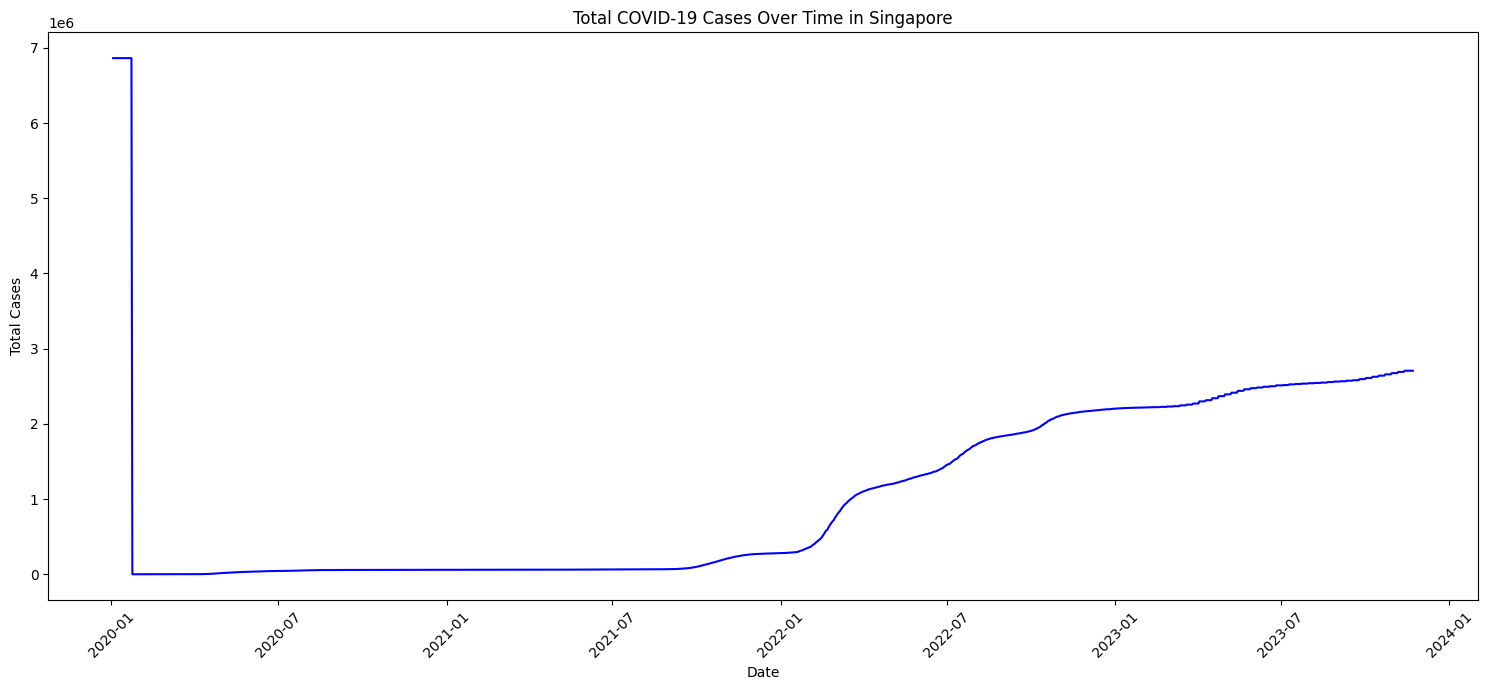

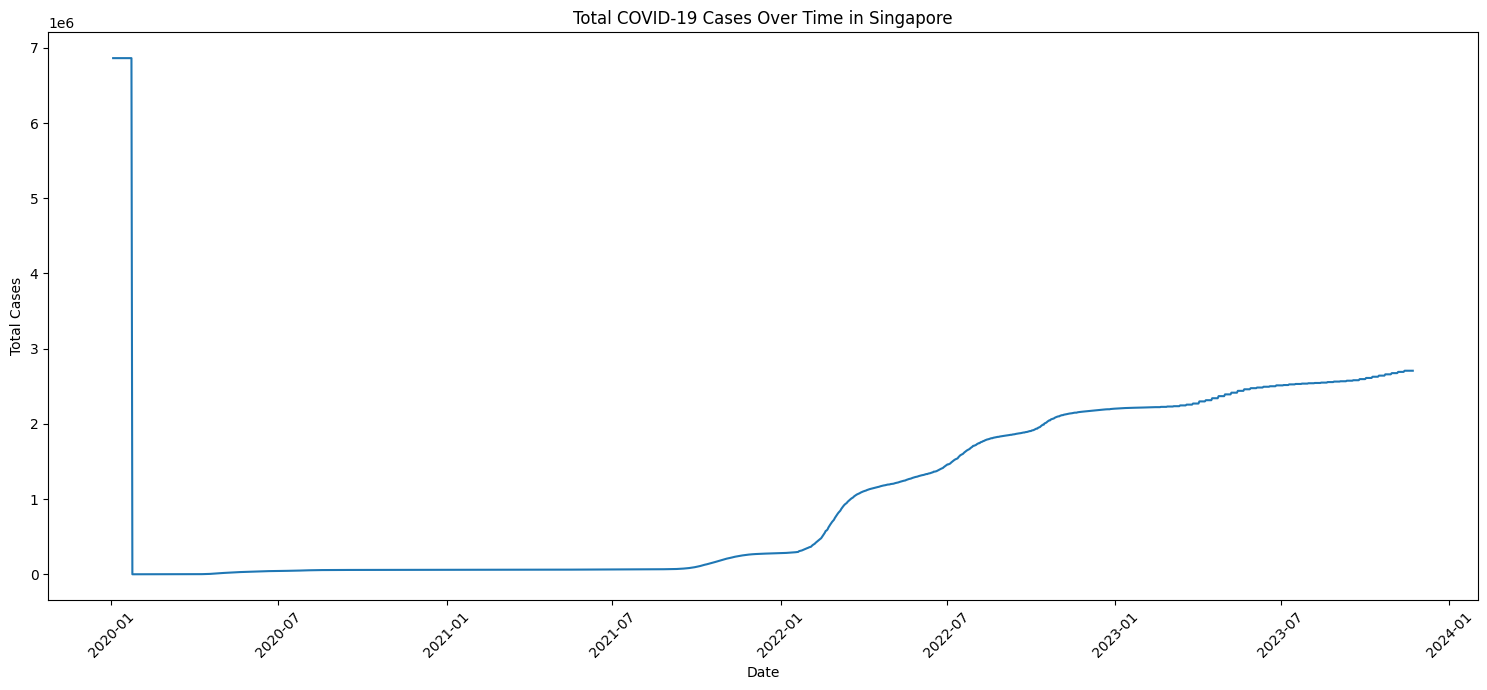

In [19]:
import seaborn as sns

# Create a line plot for total cases over time in Singapore
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_singapore, x='date', y='total_cases', color='blue')
plt.title('Total COVID-19 Cases Over Time in Singapore')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
''''''
plt.figure(figsize=(15, 7))
plt.plot(df_singapore['date'], df_singapore['total_cases'])
plt.title('Total COVID-19 Cases Over Time in Singapore')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   As of the last data point, Europe and North America had the highest total COVID-19 cases and deaths among all continents, while Oceania had the lowest.
*   The worldwide total COVID-19 cases showed a significant upward trend over time, particularly accelerating from late 2020/early 2021 onwards.
*   There is a very strong positive correlation (approximately 0.94) between the total number of COVID-19 cases and total deaths worldwide.
*   In Singapore, the total COVID-19 cases showed a relatively flat trend in the initial period, followed by a significant increase over time, mirroring the global trend but specific to the country.

### Insights or Next Steps

*   Investigate the factors contributing to the higher number of cases and deaths in Europe and North America compared to other continents.
*   Analyze the rate of increase in worldwide cases and deaths to understand the different phases of the pandemic and identify potential turning points.
